<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [0]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [0]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9195294117647059 test Score 0.9001406469760901
Estimators =  50 Train Score 0.924841854736007 test Score 0.9141449834029339
Estimators =  100 Train Score 0.9257392157476699 test Score 0.9247316390173533
Estimators =  250 Train Score 0.9237657864523536 test Score 0.9231422144888172
Estimators =  450 Train Score 0.9244627219305478 test Score 0.9235274147003905


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

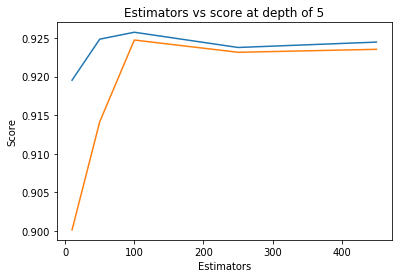

In [0]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8743995388458335 test Score 0.8690656982502477
depth =  9 Train Score 0.9582098640146134 test Score 0.9281463755532495
depth =  11 Train Score 0.9613158696314347 test Score 0.928462386566025
depth =  15 Train Score 0.9629952641239644 test Score 0.9292089808552589
depth =  20 Train Score 0.963509568602011 test Score 0.9293254758977403
depth =  35 Train Score 0.9633880501678005 test Score 0.9291438748250859
depth =  50 Train Score 0.9633880501678005 test Score 0.9291438748250859
depth =  70 Train Score 0.9633880501678005 test Score 0.9291438748250859
depth =  130 Train Score 0.9633880501678005 test Score 0.9291438748250859


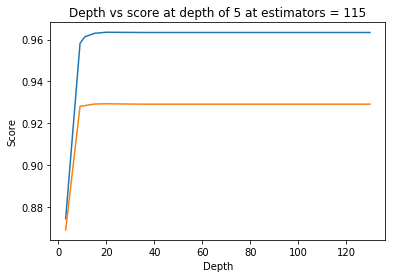

In [0]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96249309 0.96201872 0.95991506 0.96170792 0.96397655]
mean train scores [0.96339559 0.96269922 0.96055738 0.96255564 0.9649503 ]


In [0]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [0]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [0]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9656262667207134
Test f1 score 0.9306276345612065


In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


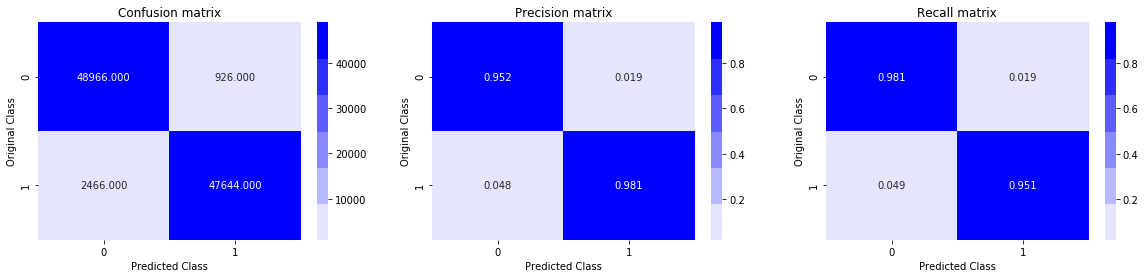

Test confusion_matrix


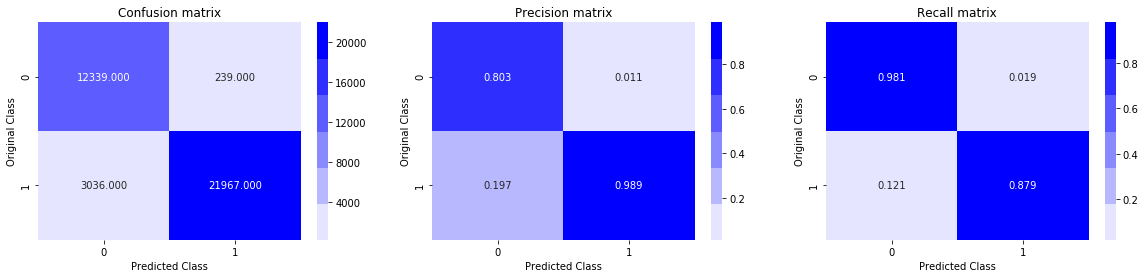

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

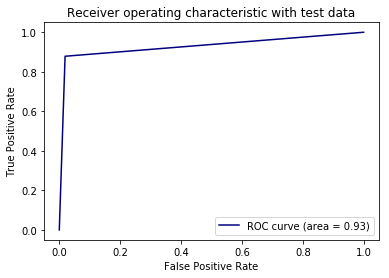

In [0]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

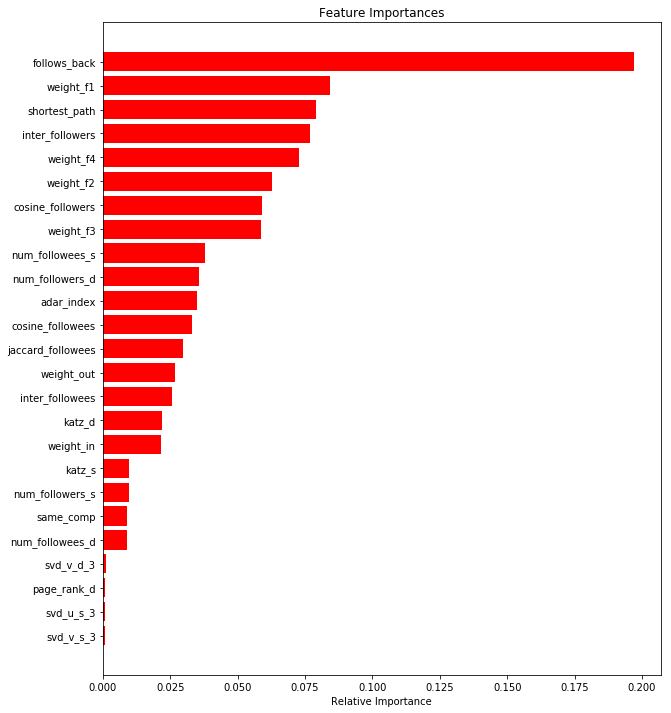

In [0]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [0]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

<h2>Task 1

In [0]:
def pref_followers(a, b):
  
    try:
    
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
      
          return 0
    
        similarity = (len(set(train_graph.predecessors(a))*(set(train_graph.predecessors(b)))))
    
        return similarity
  
    except:
    
        return 0

In [0]:
# Defining Helper function w.r.t followees

def pref_followees(a,b):

    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
          
            return 0
          
        similarity = (len(set(train_graph.successors(a))))*(len(set(train_graph.successors(b))))
        
        return  similarity
  
    except:
    
       return 0

In [113]:
pref_followees(1,2463)

0

In [114]:
pref_followees(1,200)

0

In [115]:
pref_followees(273084,1505602)

0

In [116]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [0]:
df_final_train['preferential_attachment_followers'] = df_final_train.apply(lambda x:pref_followers(x['source_node'],x['destination_node']),axis=1)
df_final_test['preferential_attachment_followers'] = df_final_test.apply(lambda x:pref_followers(x['source_node'],x['destination_node']),axis=1)


df_final_train['preferential_attachment_followees'] = df_final_train.apply(lambda x:
                                            pref_followees(x['source_node'],x['destination_node']),axis=1)
df_final_test['preferential_attachment_followees'] = df_final_test.apply(lambda x:
                                            pref_followees(x['source_node'],x['destination_node']),axis=1)

In [118]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followers,preferential_attachment_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666309e-13,4.613835e-13,1.043033e-05,6.678002e-13,2.451089e-13,3.584945e-12,-2.038018e-11,5.397949e-13,1.068942e-06,1.192461e-12,2.279492e-12,3.581202e-12,-7.215571e-13,3.926176e-13,1.983698e-06,1.545074e-13,8.108186e-13,1.719701e-14,-1.355367e-12,4.675361e-13,1.128585e-06,6.616688e-14,9.771092e-13,4.160011e-14,0,0
1,1295556,963526,1,0,0.000000,0.000000,0.000000,9,27,131,32,0,0,0.000000,0,1,3,0.188982,0.087039,0.276021,0.016449,0.465003,0.363060,3.058381e-07,8.828118e-07,0.000770,0.000842,5.300310e-13,2.342071e-15,1.019989e-14,1.090069e-14,-3.337605e-10,4.162595e-11,7.708635e-05,1.470892e-10,1.515475e-10,9.778703e-12,-9.740870e-13,7.573338e-12,1.756115e-06,6.388703e-13,2.164448e-11,4.320861e-14,-5.618920e-12,1.571062e-12,6.914455e-06,1.733208e-12,3.323972e-12,1.901158e-13,-5.964949e-12,3.005636e-12,2.541620e-06,5.606016e-12,1.995030e-12,2.031787e-13,0,0
2,862038,779418,1,0,0.266667,0.176383,0.426401,7,15,11,8,7,4,3.543179,0,1,2,0.250000,0.288675,0.538675,0.072169,0.788675,0.827350,4.136740e-07,7.269774e-07,0.000758,0.000789,4.915683e-18,3.280271e-18,2.078865e-19,4.786083e-19,-1.553796e-14,2.865015e-14,3.538424e-14,2.335941e-14,2.513134e-13,9.091663e-17,-1.036918e-14,1.910879e-14,2.480828e-14,1.563863e-14,1.649727e-13,6.057586e-17,-9.483942e-16,1.719484e-15,2.115475e-15,1.346589e-15,1.206546e-14,3.881597e-18,-2.165889e-15,3.917872e-15,4.776554e-15,3.067890e-15,1.871779e-13,8.936328e-18,0,0
3,979441,894746,1,0,0.000000,0.000000,0.000000,21,32,15,32,0,0,0.000000,1,1,3,0.174078,0.250000,0.424078,0.043519,0.598155,0.674078,1.274879e-06,2.275377e-06,0.000814,0.000858,9.826551e-16,2.177103e-15,5.492530e-15,8.431883e-15,-5.318472e-13,2.409192e-10,7.024101e-11,3.697509e-11,7.936406e-11,1.812921e-14,-2.170187e-11,3.698640e-11,5.690156e-09,2.896856e-11,5.776897e-11,4.016578e-14,-5.817820e-12,1.634761e-11,1.483481e-09,3.915119e-11,5.651652e-11,1.023756e-13,-5.594587e-12,4.915916e-10,5.337793e-10,1.611741e-11,2.631428e-10,1.571624e-13,0,0
4,1088526,99070,1,0,0.027778,0.038490,0.062994,27,10,28,9,2,1,0.676992,1,1,2,0.301511,0.185695,0.487207,0.055989,0.788718,0.672902,2.021736e-06,1.614656e-06,0.000837,0.000770,6.160798e-16,2.632996e-16,5.674428e-16,2.633843e-16,-2.234400e-11,1.312866e-11,1.377257e-10,6.628748e-13,2.808901e-12,1.136628e-14,-2.775996e-11,4.918542e-10,4.220389e-11,4.723662e-12,7.583023e-11,4.857691e-15,-1.015052e-11,1.874409e-11,4.743309e-11,1.947993e-12,4.150070e-12,1.057661e-14,-7.046255e-13,1.093858e-11,1.137450e-11,3.289914e-14,8.590561e-13,4.909247e-15,0,0


In [119]:
df_final_train["preferential_attachment_followees"].value_counts()

0    100002
Name: preferential_attachment_followees, dtype: int64

In [120]:
df_final_train["preferential_attachment_followers"].value_counts()

0    100002
Name: preferential_attachment_followers, dtype: int64

from the above results using above feature ...we cant obtain frnd recomendation ...if we observe we had all values as zero...so this might not be useful...........we can infer from this that ..............consider two person a,b who had max no. of frnds there least possibility that a and b can be frnds

In [121]:
df_final_train.shape

(100002, 57)

In [131]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment_followers',
       'preferential_attachment_followees'],
      dtype='obj

<h3>task 2

In [0]:
df_final_train['source_dot']=((df_final_train['svd_u_s_1']*df_final_train['svd_u_d_1'])+(df_final_train['svd_u_s_2']*df_final_train['svd_u_d_2'])+(df_final_train['svd_u_s_3']*df_final_train['svd_u_d_3'])+(df_final_train['svd_u_s_4']*df_final_train['svd_u_d_4'])+(df_final_train['svd_u_s_5']*df_final_train['svd_u_d_5'])+(df_final_train['svd_u_s_6']*df_final_train['svd_u_d_6']))

In [0]:
df_final_train['destina_dot']=((df_final_train['svd_v_s_1']*df_final_train['svd_v_d_1'])+(df_final_train['svd_v_s_2']*df_final_train['svd_v_d_2'])+(df_final_train['svd_v_s_3']*df_final_train['svd_v_d_3'])+(df_final_train['svd_v_s_4']*df_final_train['svd_v_d_4'])+(df_final_train['svd_v_s_5']*df_final_train['svd_v_d_5'])+(df_final_train['svd_v_s_6']*df_final_train['svd_v_d_6']))

In [0]:
df_final_test['source_dot']=((df_final_test['svd_u_s_1']*df_final_test['svd_u_d_1'])+(df_final_test['svd_u_s_2']*df_final_test['svd_u_d_2'])+(df_final_test['svd_u_s_3']*df_final_test['svd_u_d_3'])+(df_final_test['svd_u_s_4']*df_final_test['svd_u_d_4'])+(df_final_test['svd_u_s_5']*df_final_test['svd_u_d_5'])+(df_final_test['svd_u_s_6']*df_final_test['svd_u_d_6']))

In [0]:
df_final_test['destina_dot']=((df_final_test['svd_v_s_1']*df_final_test['svd_v_d_1'])+(df_final_test['svd_v_s_2']*df_final_test['svd_v_d_2'])+(df_final_test['svd_v_s_3']*df_final_test['svd_v_d_3'])+(df_final_test['svd_v_s_4']*df_final_test['svd_v_d_4'])+(df_final_test['svd_v_s_5']*df_final_test['svd_v_d_5'])+(df_final_test['svd_v_s_6']*df_final_test['svd_v_d_6']))

In [155]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followers,preferential_attachment_followees,source_dot,destina_dot
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666309e-13,4.613835e-13,1.043033e-05,6.678002e-13,2.451089e-13,3.584945e-12,-2.038018e-11,5.397949e-13,1.068942e-06,1.192461e-12,2.279492e-12,3.581202e-12,-7.215571e-13,3.926176e-13,1.983698e-06,1.545074e-13,8.108186e-13,1.719701e-14,-1.355367e-12,4.675361e-13,1.128585e-06,6.616688e-14,9.771092e-13,4.160011e-14,0,0,1.114942e-11,2.238771e-12
1,1295556,963526,1,0,0.000000,0.000000,0.000000,9,27,131,32,0,0,0.000000,0,1,3,0.188982,0.087039,0.276021,0.016449,0.465003,0.363060,3.058381e-07,8.828118e-07,0.000770,0.000842,5.300310e-13,2.342071e-15,1.019989e-14,1.090069e-14,-3.337605e-10,4.162595e-11,7.708635e-05,1.470892e-10,1.515475e-10,9.778703e-12,-9.740870e-13,7.573338e-12,1.756115e-06,6.388703e-13,2.164448e-11,4.320861e-14,-5.618920e-12,1.571062e-12,6.914455e-06,1.733208e-12,3.323972e-12,1.901158e-13,-5.964949e-12,3.005636e-12,2.541620e-06,5.606016e-12,1.995030e-12,2.031787e-13,0,0,1.353725e-10,1.757391e-11
2,862038,779418,1,0,0.266667,0.176383,0.426401,7,15,11,8,7,4,3.543179,0,1,2,0.250000,0.288675,0.538675,0.072169,0.788675,0.827350,4.136740e-07,7.269774e-07,0.000758,0.000789,4.915683e-18,3.280271e-18,2.078865e-19,4.786083e-19,-1.553796e-14,2.865015e-14,3.538424e-14,2.335941e-14,2.513134e-13,9.091663e-17,-1.036918e-14,1.910879e-14,2.480828e-14,1.563863e-14,1.649727e-13,6.057586e-17,-9.483942e-16,1.719484e-15,2.115475e-15,1.346589e-15,1.206546e-14,3.881597e-18,-2.165889e-15,3.917872e-15,4.776554e-15,3.067890e-15,1.871779e-13,8.936328e-18,0,0,4.341157e-26,2.281413e-27
3,979441,894746,1,0,0.000000,0.000000,0.000000,21,32,15,32,0,0,0.000000,1,1,3,0.174078,0.250000,0.424078,0.043519,0.598155,0.674078,1.274879e-06,2.275377e-06,0.000814,0.000858,9.826551e-16,2.177103e-15,5.492530e-15,8.431883e-15,-5.318472e-13,2.409192e-10,7.024101e-11,3.697509e-11,7.936406e-11,1.812921e-14,-2.170187e-11,3.698640e-11,5.690156e-09,2.896856e-11,5.776897e-11,4.016578e-14,-5.817820e-12,1.634761e-11,1.483481e-09,3.915119e-11,5.651652e-11,1.023756e-13,-5.594587e-12,4.915916e-10,5.337793e-10,1.611741e-11,2.631428e-10,1.571624e-13,0,0,4.142605e-19,8.154232e-19
4,1088526,99070,1,0,0.027778,0.038490,0.062994,27,10,28,9,2,1,0.676992,1,1,2,0.301511,0.185695,0.487207,0.055989,0.788718,0.672902,2.021736e-06,1.614656e-06,0.000837,0.000770,6.160798e-16,2.632996e-16,5.674428e-16,2.633843e-16,-2.234400e-11,1.312866e-11,1.377257e-10,6.628748e-13,2.808901e-12,1.136628e-14,-2.775996e-11,4.918542e-10,4.220389e-11,4.723662e-12,7.583023e-11,4.857691e-15,-1.015052e-11,1.874409e-11,4.743309e-11,1.947993e-12,4.150070e-12,1.057661e-14,-7.046255e-13,1.093858e-11,1.137450e-11,3.289914e-14,8.590561e-13,4.909247e-15,0,0,1.310634e-20,7.553429e-22


In [156]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followers,preferential_attachment_followees,source_dot,destina_dot
0,848424,784690,1,0,0.000000,0.029161,0.000000,6,14,6,9,1,0,0.000000,1,1,2,0.258199,0.377964,0.636163,0.097590,0.894362,1.014128,6.557971e-07,1.559547e-06,0.000754,0.000786,3.243237e-16,1.745627e-16,2.969838e-15,9.269213e-14,-9.987980e-12,2.283711e-13,1.439959e-10,6.136166e-13,4.188174e-13,5.983502e-15,-1.026186e-11,5.316669e-13,5.843125e-10,1.166049e-13,2.253362e-11,3.220542e-15,-2.148852e-13,1.883275e-13,5.904801e-11,2.701538e-12,4.341610e-13,5.535503e-14,-9.994076e-10,5.791950e-10,3.512350e-07,2.486660e-09,2.771134e-09,1.727695e-12,0,0,8.425072e-20,2.074798e-17
1,1288618,816620,1,0,0.232558,0.068041,0.382920,24,12,31,22,4,10,11.923852,1,1,2,0.277350,0.176777,0.454127,0.049029,0.731477,0.630903,1.899925e-06,7.858812e-07,0.000826,0.000781,8.788386e-11,6.864391e-11,7.047267e-12,3.198277e-12,-5.998970e-12,9.210175e-11,5.212824e-10,1.077997e-08,7.510915e-11,1.621397e-09,-5.347473e-11,1.864835e-10,1.586034e-09,7.420230e-09,7.559939e-11,1.266433e-09,-2.999451e-12,1.859227e-11,5.217890e-11,8.327158e-10,3.605103e-11,1.313545e-10,-9.083280e-10,6.860668e-10,2.349931e-11,4.769775e-10,1.302441e-09,5.961293e-11,0,0,8.289323e-17,4.686777e-19
2,1747456,75621,1,0,0.000000,0.000000,0.000000,11,15,12,0,0,0,0.000000,0,1,5,0.250000,0.277350,0.527350,0.069338,0.777350,0.804700,9.047341e-07,1.780068e-06,0.000774,0.000795,1.464039e-14,0.000000e+00,6.832277e-15,1.199223e-12,-2.940600e-13,1.375837e-12,3.677050e-11,6.530851e-11,1.064616e-11,2.701050e-13,-5.766869e-20,-6.070228e-20,-6.970175e-20,1.531312e-19,-6.480824e-20,-1.055774e-19,-2.226246e-13,8.476719e-12,4.859797e-12,5.260503e-11,1.216465e-12,1.273473e-13,-1.876396e-09,1.128561e-10,2.659743e-10,1.333574e-10,3.909763e-10,2.235240e-11,0,0,6.652768e-30,1.016069e-20
3,1451525,350908,1,0,0.008475,0.000000,0.053606,110,1,116,3,0,1,0.472306,1,1,2,0.707107,0.092450,0.799557,0.065372,1.506664,0.892007,6.111870e-06,1.693235e-07,0.001196,0.000738,1.504732e-12,4.852579e-15,2.803527e-13,8.088647e-15,-9.208907e-11,2.887168e-11,1.012931e-04,1.209041e-11,1.125255e-10,2.776126e-11,-1.210866e-11,9.361280e-13,1.044654e-05,7.415301e-13,5.912051e-12,8.952656e-14,-5.256396e-11,2.754437e-11,1.675501e-04,4.608594e-11,3.285265e-10,5.225502e-12,-1.503337e-12,2.155034e-13,1.375822e-06,2.544761e-13,9.177577e-13,1.507649e-13,0,0,1.058163e-09,2.305191e-10
4,43098,808116,1,0,0.000000,0.058926,0.000000,8,24,0,10,4,0,0.000000,1,1,-1,0.200000,1.000000,1.200000,0.200000,1.400000,2.200000,6.021455e-07,1.791214e-06,0.000764,0.000827,0.000000e+00,1.774621e-15,3.406256e-15,9.267794e-14,2.068375e-20,2.389721e-20,1.320685e-20,-4.855423e-20,2.118878e-20,2.962930e-20,-1.144107e-11,3.778722e-11,6.074622e-10,8.452381e-12,4.002841e-11,3.274043e-14,-8.772443e-12,4.784376e-12,6.042045e-10,5.810217e-13,2.113580e-11,6.348943e-14,-2.007326e-11,3.242395e-10,4.379903e-08,3.553562e-12,1.093515e-09,1.727431e-12,0,0,9.127750e-30,2.648841e-17


In [157]:
df_final_train.shape

(100002, 59)

In [159]:
df_final_test.shape

(37581, 59)

In [158]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment_followers',
       'preferential_attachment_followees', 'source_dot', 'de

In [160]:
df_final_test.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment_followers',
       'preferential_attachment_followees', 'source_dot', 'de

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

<h2>task 3

In [0]:
df_final_train_xgb = df_final_train.values
df_final_test_xgb = df_final_test.values

<h3>tunning hyper param

In [172]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

# hyperparameter tuning for max_depth and min_child_weight
min_logloss = float("Inf")
best_params = None

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3, 10)
    for min_child_weight in range(1, 5)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Run CV
    cv_results = xgb.cv(
        params,
        d_train,
        seed=42,
        nfold=10,
        metrics={'logloss'},
        early_stopping_rounds=10
    )
    
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogLoss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (max_depth,min_child_weight)

CV with max_depth=3, min_child_weight=1
	LogLoss 0.5778518 for 9 rounds
CV with max_depth=3, min_child_weight=2
	LogLoss 0.5778518 for 9 rounds
CV with max_depth=3, min_child_weight=3
	LogLoss 0.5778518 for 9 rounds
CV with max_depth=3, min_child_weight=4
	LogLoss 0.5778518 for 9 rounds
CV with max_depth=4, min_child_weight=1
	LogLoss 0.5673511 for 9 rounds
CV with max_depth=4, min_child_weight=2
	LogLoss 0.5673511 for 9 rounds
CV with max_depth=4, min_child_weight=3
	LogLoss 0.5673511 for 9 rounds
CV with max_depth=4, min_child_weight=4
	LogLoss 0.5673511 for 9 rounds
CV with max_depth=5, min_child_weight=1
	LogLoss 0.5613701 for 9 rounds
CV with max_depth=5, min_child_weight=2
	LogLoss 0.5613701 for 9 rounds
CV with max_depth=5, min_child_weight=3
	LogLoss 0.5613701 for 9 rounds
CV with max_depth=5, min_child_weight=4
	LogLoss 0.5613701 for 9 rounds
CV with max_depth=6, min_child_weight=1
	LogLoss 0.5582849999999999 for 9 rounds
CV with max_depth=6, min_child_weight=2
	LogLoss 0.5582

In [173]:
# best max_depth and min_child_weight
print("Best params: {}, {}".format(best_params[0], best_params[1]))

Best params: 9, 1


In [174]:
# hyperparameter tuning for subsample and colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10 for i in range(6,10)]
    for colsample in [i/10 for i in range(6,10)]
]

min_logloss = float("Inf")
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    # Run CV
    cv_results = xgb.cv(
        params,
        d_train,
        seed=42,
        nfold=10,
        metrics={'logloss'},
        early_stopping_rounds=10
    )

    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogLoss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (subsample,colsample)

# Best subsample and colsample 
print("Best params: {}, {}".format(best_params[0], best_params[1]))

CV with subsample=0.9, colsample=0.9
	LogLoss 0.542881 for 9 rounds
CV with subsample=0.9, colsample=0.8
	LogLoss 0.5454245999999999 for 9 rounds
CV with subsample=0.9, colsample=0.7
	LogLoss 0.5467907000000001 for 9 rounds
CV with subsample=0.9, colsample=0.6
	LogLoss 0.5497812 for 9 rounds
CV with subsample=0.8, colsample=0.9
	LogLoss 0.5429541 for 9 rounds
CV with subsample=0.8, colsample=0.8
	LogLoss 0.5454563 for 9 rounds
CV with subsample=0.8, colsample=0.7
	LogLoss 0.5468508 for 9 rounds
CV with subsample=0.8, colsample=0.6
	LogLoss 0.5498073 for 9 rounds
CV with subsample=0.7, colsample=0.9
	LogLoss 0.5429560999999999 for 9 rounds
CV with subsample=0.7, colsample=0.8
	LogLoss 0.5454895000000001 for 9 rounds
CV with subsample=0.7, colsample=0.7
	LogLoss 0.5468147 for 9 rounds
CV with subsample=0.7, colsample=0.6
	LogLoss 0.5499069999999999 for 9 rounds
CV with subsample=0.6, colsample=0.9
	LogLoss 0.5430425999999999 for 9 rounds
CV with subsample=0.6, colsample=0.8
	LogLoss 0.54

In [175]:
# hyperparameter tuning for gamma
min_logloss = float("Inf")
best_params = None

gridsearch_params=[gamma
    for gamma in [i/10.0 for i in range(0,5)]]

for gamma in gridsearch_params:
    print("CV with gamma={}".format(gamma))

    # We update our parameters
    params['gamma'] = gamma

    # Run and time CV
    cv_results = xgb.cv(
            params,
            d_train,
            seed=42,
            nfold=10,
            metrics=['logloss'],
            early_stopping_rounds=10
          )

    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogLoss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = gamma

# Best hyperparameter gamma 
print("Best params: {}".format(best_params))

CV with gamma=0.0
	LogLoss 0.5499903 for 9 rounds
CV with gamma=0.1
	LogLoss 0.5499903999999999 for 9 rounds
CV with gamma=0.2
	LogLoss 0.5499903 for 9 rounds
CV with gamma=0.3
	LogLoss 0.5499891 for 9 rounds
CV with gamma=0.4
	LogLoss 0.5499881999999999 for 9 rounds
Best params: 0.4


In [176]:
# hyperparameter tuning for reg_alpha
min_logloss = float("Inf")
best_params = None


for reg_alpha in [1e-5, 1e-2, 0.1, 1, 100]:
    print("CV with reg_alpha={}".format(reg_alpha))

    # We update our parameters
    params['reg_alpha'] = reg_alpha

    # Run and time CV
    cv_results = xgb.cv(
            params,
            d_train,
            seed=42,
            nfold=10,
            metrics=['logloss'],
            early_stopping_rounds=10
          )

    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogLoss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = reg_alpha

# best reg_alpha        
print("Best params: {}".format(best_params))

CV with reg_alpha=1e-05
	LogLoss 0.5499881999999999 for 9 rounds
CV with reg_alpha=0.01
	LogLoss 0.5499909 for 9 rounds
CV with reg_alpha=0.1
	LogLoss 0.550006 for 9 rounds
CV with reg_alpha=1
	LogLoss 0.5501967999999999 for 9 rounds
CV with reg_alpha=100
	LogLoss 0.5636141 for 9 rounds
Best params: 1e-05


In [177]:
# hyperparameter tuning for number of estimators
min_logloss = float("Inf")
best_params = None

for n_estimators in [80, 95, 100, 140, 175, 250, 400, 600, 700, 900]:
    print("CV with n_estimators={}".format(n_estimators))

    # We update our parameters
    params['n_estimators'] = n_estimators

    # Run and time CV
    cv_results = xgb.cv(
            params,
            d_train,
            seed=42,
            nfold=10,
            metrics=['logloss'],
            early_stopping_rounds=10
          )

    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogLoss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = n_estimators
# Best n_estimators
print("Best params: {}".format(best_params))

CV with n_estimators=80
	LogLoss 0.5636141 for 9 rounds
CV with n_estimators=95
	LogLoss 0.5636141 for 9 rounds
CV with n_estimators=100
	LogLoss 0.5636141 for 9 rounds
CV with n_estimators=140
	LogLoss 0.5636141 for 9 rounds
CV with n_estimators=175
	LogLoss 0.5636141 for 9 rounds
CV with n_estimators=250
	LogLoss 0.5636141 for 9 rounds
CV with n_estimators=400
	LogLoss 0.5636141 for 9 rounds
CV with n_estimators=600
	LogLoss 0.5636141 for 9 rounds
CV with n_estimators=700
	LogLoss 0.5636141 for 9 rounds
CV with n_estimators=900
	LogLoss 0.5636141 for 9 rounds
Best params: 80


<h3>after hyper param

In [179]:
from sklearn.metrics import f1_score
clf = xgb.XGBClassifier(max_depth = 9,learning_rate=0.01,
                        min_child_weight=1.0,
                        reg_alpha = 1e-05, 
                        colsample_bytree = 0.9,colsample_bylevel = 0.7, 
                        gamma = 0.4, 
                        n_estimators=80, subsample = 0.9,  verbose=2, n_jobs = -1,
                        silent = False)
clf.fit(df_final_train_xgb,y_train)
predict_y = clf.predict(df_final_test_xgb)
#log_loss(y_test, predict_y, eps=1e-15)
#print("The log loss is:",log_loss(y_test, predict_y,  eps=1e-15))
pred_y_train = clf.predict(df_final_train_xgb)



print('Train f1 score',f1_score(y_train,pred_y_train))
print('Test f1 score',f1_score(y_test,predict_y))



Train f1 score 0.9749711439159225
Test f1 score 0.932781667727562


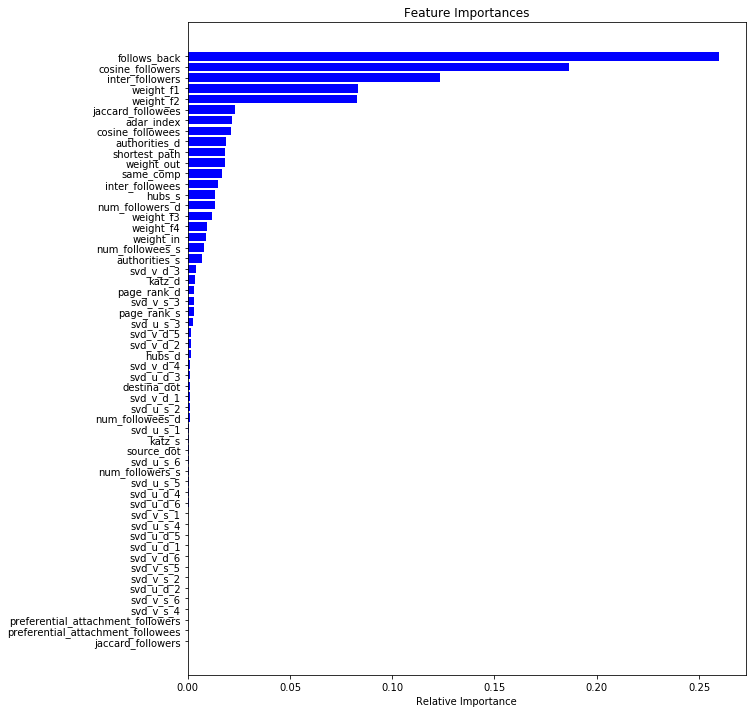

In [180]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-68:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



<h1>conclusion:<br></h1>
STEP-1:intially took 'source-node' and 'destination-node'<br>
STEP-2:added various features<br>
STEP-3:after adding various features we tried out with some more features like preferencial-attachment,svd-dot<br>
STEP-4:using xgboost we got train and test f1score 97,93<br>
STEP-5:using above graph more important features can be observed